In [1]:
import pipeline

%matplotlib inline

In [2]:
pipeline.get_file_names('2016jul14/', 5, 10)

['2016jul14//n0005.fits',
 '2016jul14//n0006.fits',
 '2016jul14//n0007.fits',
 '2016jul14//n0008.fits',
 '2016jul14//n0009.fits',
 '2016jul14//n0010.fits']

In [3]:
img_loc = '2016jul14/'

In [4]:
master_sky = pipeline.average(img_loc, 95, 99)
master_sky.shape

(1024, 1024)

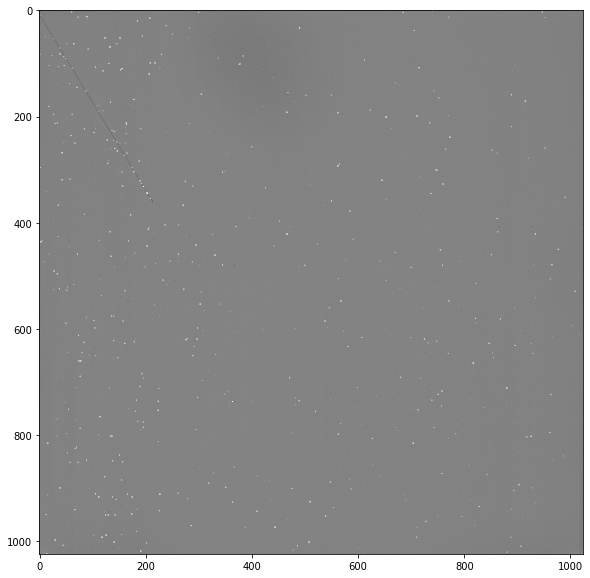

In [5]:
pipeline.plot_img(master_sky)

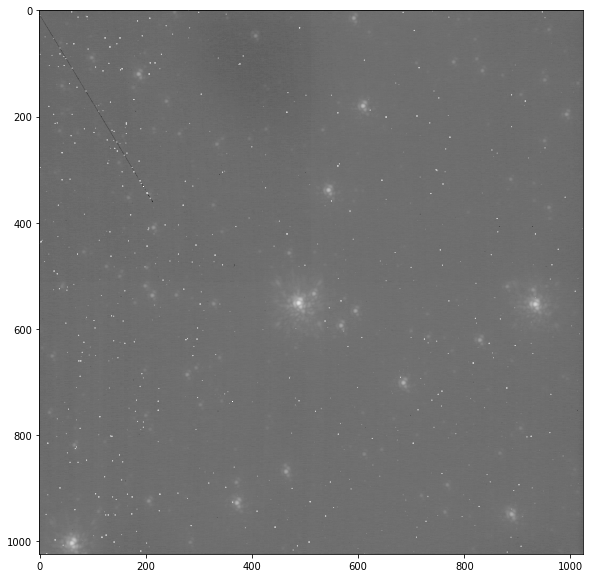

In [9]:
acq_frame = pipeline.get_data(pipeline.get_file_names(img_loc, 156,156))[0]
pipeline.plot_img(acq_frame)

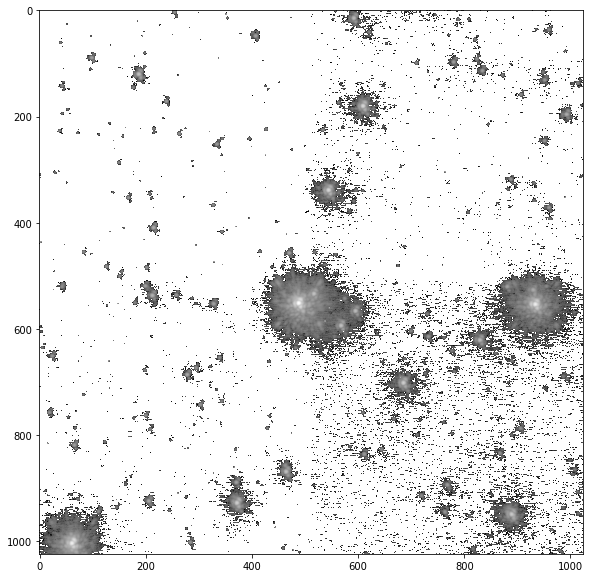

In [10]:
pipeline.plot_img(acq_frame - master_sky)